In [676]:
import glob
import os
import pandas as pd
import numpy as np

sns.set_context("notebook")
# sns.set_style("darkgrid")
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Write short sym links for every sample + cell type DAR set combination

In [677]:
samples = sorted(
    list(
        set(
            [
                x.split("/")[-1].split(".")[0]
                for x in sorted(glob.glob("downstream_analysis/DARs/*/*"))
            ]
        )
    )
)
samples

['10xmultiome_celltypefair_1',
 '10xv11_celltypefair_1',
 '10xv1_celltypefair_1',
 '10xv2_celltypefair_1',
 'ddseq_celltypefair_1',
 'hydrop_celltypefair_1',
 'mtscatac_celltypefair_1',
 's3atac_celltypefair_1']

In [678]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

{'10xmultiome_celltypefair_1': 0,
 '10xv11_celltypefair_1': 1,
 '10xv1_celltypefair_1': 2,
 '10xv2_celltypefair_1': 3,
 'ddseq_celltypefair_1': 4,
 'hydrop_celltypefair_1': 5,
 'mtscatac_celltypefair_1': 6,
 's3atac_celltypefair_1': 7}

In [679]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

In [680]:
cell_types = list(
    set(
        [
            x.split("/")[-1].split("__")[1]
            for x in sorted(glob.glob("downstream_analysis/DARs/*/*"))
        ]
    )
)

cell_type_path = f"upset_mergepeaks/DARs/"
if not os.path.exists(cell_type_path):
    os.mkdir(cell_type_path)

## make sure that every DAR has a unique name


In [681]:
for file_path in sorted(glob.glob("downstream_analysis/DARs/*/*__DARs.bed")):
    print(file_path)
    if not os.path.exists(file_path.replace(".bed", ".unique.bed")):
        df = pd.read_csv(file_path, sep="\t", header=None)
        df[3] = df[3] + "_" + [str(x) for x in pd.DataFrame(range(len(df)))[0]]
        df.to_csv(
            file_path.replace(".bed", ".unique.bed"), header=None, index=False, sep="\t"
        )

downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__B_cell__DARs.bed
downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.bed
downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.bed
downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.bed
downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed
downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.bed
downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__Natural_killer_cell__DARs.bed
downstream_analysis/DARs/10xv11_celltypefair_1.FIXEDCELLS/10xv11_celltypefair_1.FIXEDCELLS__B_cell__DARs.bed
downst

In [682]:
for cell_type in cell_types:
    print(cell_type)
    paths = sorted(
        glob.glob(f"downstream_analysis/DARs/*/*{cell_type}__DARs.unique.bed")
    )
    print(paths)
    for path in paths:
        sample = path.split("/")[-1].split(".")[0]

        symlink_path = f"{cell_type_path}{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"

        if not os.path.exists(symlink_path):
            print(symlink_path)
            print("not")
            os.symlink(f"../../{path}", f"{symlink_path}")

B_cell
['downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed', 'downstream_analysis/DARs/10xv11_celltypefair_1.FIXEDCELLS/10xv11_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed', 'downstream_analysis/DARs/10xv1_celltypefair_1.FIXEDCELLS/10xv1_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed', 'downstream_analysis/DARs/10xv2_celltypefair_1.FIXEDCELLS/10xv2_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed', 'downstream_analysis/DARs/ddseq_celltypefair_1.FIXEDCELLS/ddseq_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed', 'downstream_analysis/DARs/hydrop_celltypefair_1.FIXEDCELLS/hydrop_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed', 'downstream_analysis/DARs/mtscatac_celltypefair_1.FIXEDCELLS/mtscatac_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed', 'downstream_analysis/DARs/s3atac_celltypefair_1.FIXEDCELLS/s3atac_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed']
Natural_killer_cell
['downstream

# add sym links for the merged set DARs:

In [683]:
for file_path in sorted(
    glob.glob(
        "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*__DARs.bed"
    )
):
    print(file_path)
    if not os.path.exists(file_path.replace(".bed", ".unique.bed")):
        df = pd.read_csv(file_path, sep="\t", header=None)
        df[3] = df[3] + "_" + [str(x) for x in pd.DataFrame(range(len(df)))[0]]
        df.to_csv(
            file_path.replace(".bed", ".unique.bed"), header=None, index=False, sep="\t"
        )

../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.bed
../fixedcells_7_merged_eq

In [684]:
merged_peak_path_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*unique.bed"
        )
    )
}

for sample, path in merged_peak_path_dict.items():
    print(sample)
    path_top = path.replace(".bed", "__top20pct.bed")
    path_bot = path.replace(".bed", "__bot20pct.bed")
    if not os.path.exists(path_top):
        df = pd.read_csv(path, sep="\t", header=None)

        df_top = df[df[4] > np.percentile(df[4], 80)]
        df_bot = df[df[4] < np.percentile(df[4], 20)]

        df_bot.to_csv(path_bot, sep="\t", index=False, header=None)
        df_top.to_csv(path_top, sep="\t", index=False, header=None)

B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell


In [685]:
# for cell_type in cell_types:
#     # print(cell_type)
#     paths = sorted(
#         glob.glob(
#             f"../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*{cell_type}__DARs.unique_*20pct.bed"
#         )
#     )
#     # print(paths)

#     for path in paths:
#         # sample = path.split("/")[-1].split(".")[0]
#         sample = (
#             path.split("__")[-1]
#             .replace("top20pct.bed", "t")
#             .replace("bot20pct.bed", "b")
#         )

#         symlink_path = f"{cell_type_path}{cell_types_numbers_dict[cell_type]}_{sample}"

#         if not os.path.exists(symlink_path):
#             print(symlink_path)
#             print("not")
#             os.symlink(f"../../{path}", f"{symlink_path}")

# now write the parallel file

In [686]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

In [687]:
cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}
cell_types_numbers_dict_rev

{'a': 'Dendritic_cell',
 'b': 'Cytotoxic_T_cell',
 'c': 'Natural_killer_cell',
 'd': 'DARs_dict.pkl',
 'e': 'CD14+_monocyte',
 'f': 'CD16+_monocyte',
 'g': 'B_cell',
 'h': 'CD4+_T_cell'}

In [688]:
merged_dar_path_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*DARs.unique.bed"
        )
    )
}
merged_dar_path_dict

{'B_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed',
 'CD14+_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.unique.bed',
 'CD16+_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.unique.bed',
 'CD4+_T_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.unique.bed',
 'Cytotoxic_T_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique.bed',
 'Dendritic_cell': '../fixedcells_7_merged_equalcells

In [689]:
merged_dar_path_top_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*top20pct.bed"
        )
    )
}

merged_dar_path_bot_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*bot20pct.bed"
        )
    )
}

merged_dar_path_bot_dict

{'B_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique__bot20pct.bed',
 'CD14+_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.unique__bot20pct.bed',
 'CD16+_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.unique__bot20pct.bed',
 'CD4+_T_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.unique__bot20pct.bed',
 'Cytotoxic_T_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique__bot20pct.bed',
 'D

In [690]:
parallel_filename = "homer_mergepeaks_DARs.parallel"
cell_type_aliases = set(
    [
        x.split("/")[-1].split("_")[0]
        for x in sorted(glob.glob("upset_mergepeaks/DARs/*"))
    ]
)

with open(parallel_filename, "w") as f:
    for cell_type_alias in cell_type_aliases:
        # print(cell_type)
        dar_paths = sorted(glob.glob(f"upset_mergepeaks/DARs/{cell_type_alias}*"))
        # dar_paths = [x.split("/")[-1] for x in dar_paths]

        cell_type = cell_types_numbers_dict_rev[cell_type_alias]
        merged_dar_path_top = merged_dar_path_top_dict[cell_type]
        merged_dar_path_bot = merged_dar_path_bot_dict[cell_type]

        for dar_path in dar_paths:
            sample_number = dar_path.split("_")[-1]
            command = f"mergePeaks -d given {dar_path} {merged_dar_path_top} -prefix upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars__ -venn upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_venn.txt -matrix upset_mergepeaks/{cell_type_alias}_{sample_number}__top20pct_dars_matrix.txt > upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_*"
            f.write(f"{command}\n")
            print(command)

            command = f"mergePeaks -d given {dar_path} {merged_dar_path_bot} -prefix upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars__ -venn upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_venn.txt -matrix upset_mergepeaks/{cell_type_alias}_{sample_number}__bot20pct_dars_matrix.txt > upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_*"
            f.write(f"{command}\n")
            print(command)

mergePeaks -d given upset_mergepeaks/DARs/b_0 ../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique__top20pct.bed -prefix upset_mergepeaks/FIXEDCELLS__b_0__dars__ -venn upset_mergepeaks/FIXEDCELLS__b_0__dars_venn.txt -matrix upset_mergepeaks/b_0__top20pct_dars_matrix.txt > upset_mergepeaks/FIXEDCELLS__b_0__dars_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__b_0__dars_*
mergePeaks -d given upset_mergepeaks/DARs/b_0 ../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique__bot20pct.bed -prefix upset_mergepeaks/FIXEDCELLS__b_0__dars__ -venn upset_mergepeaks/FIXEDCELLS__b_0__dars_venn.txt -matrix upset_mergepeaks/b_0__bot20pct_dars_matrix.txt > upset_mergepeaks/FIXEDCELLS__b_0__dars_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__b_0__dars_*
mergePeaks -d given upset_

```
module load HOMER/4.11-foss-2021a
my_conda_initialize
cat homer_mergepeaks_DARs.parallel | parallel -j 16 --progress
```

# Do the same, for peaks

In [691]:
cell_types_numbers_dict = {
    "CD16_monocyte": "i",
    "CD4_Tcell": "j",
    "CD14_monocyte": "k",
    "Naturalkillercell": "l",
    "Dendriticcell": "m",
    "CytotoxicTcell": "n",
    "Bcell": "o",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}
cell_types_numbers_dict

{'CD16_monocyte': 'i',
 'CD4_Tcell': 'j',
 'CD14_monocyte': 'k',
 'Naturalkillercell': 'l',
 'Dendriticcell': 'm',
 'CytotoxicTcell': 'n',
 'Bcell': 'o'}

In [692]:
samples_number_dict["master_celltypefairmerged_1"] = 99

In [693]:
# cell_types = list(
#     set(
#         [
#             x.split("/")[-1].split("_p")[0]
#             for x in sorted(glob.glob("final_consensus_peaks/*/*_peaks.narrowPeak"))
#         ]
#     )
# )

# for cell_type in cell_types:
#     paths = sorted(glob.glob(f"final_consensus_peaks/*/*{cell_type}*_peaks.narrowPeak"))
#     for path in paths:
#         sample = path.split("/")[-2].split(".")[0]
#         cell_type_path = f"upset_mergepeaks/peaks/"
#         if not os.path.exists(cell_type_path):
#             os.mkdir(cell_type_path)

#         symlink_path = f"{cell_type_path}/{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"
#         if not os.path.exists(symlink_path):
#             os.symlink(f"../../{path}", f"{symlink_path}")

In [694]:
sorted(
    set(
        [
            x.split("/")[-1].split(".")[0]
            for x in sorted(glob.glob(f"final_consensus_peaks/*/*bw"))
        ]
    )
)

['Bcell',
 'CD14_monocyte',
 'CD16_monocyte',
 'CD4_Tcell',
 'CytotoxicTcell',
 'Dendriticcell',
 'Naturalkillercell']

In [695]:
cell_types = sorted(
    set(
        [
            x.split("/")[-1].split(".")[0]
            for x in sorted(glob.glob(f"final_consensus_peaks/*/*bw"))
        ]
    )
)
for cell_type in cell_types:
    paths = sorted(glob.glob(f"final_consensus_peaks/*/*{cell_type}*_peaks.narrowPeak"))
    for path in paths:
        sample = path.split("/")[-2].split(".")[0]
        cell_type_path = f"upset_mergepeaks/peaks/"
        if not os.path.exists(cell_type_path):
            os.mkdir(cell_type_path)

        symlink_path = f"{cell_type_path}/{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"
        if not os.path.exists(symlink_path):
            os.symlink(f"../../{path}", f"{symlink_path}")

In [696]:
# for peak_path in sorted(
#     glob.glob(
#         "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/*bed"
#     )
# ):
#     if not os.path.exists(peak_path.replace(".bed", ".top20pct.bed")):
#         print("test")
#         df = pd.read_csv(peak_path, sep="\t", header=None)

In [697]:
for peak_path in sorted(
    glob.glob(
        "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/*summits.bed"
    )
):
    path_top = peak_path.replace(".bed", "__top20pct.bed")
    path_bot = peak_path.replace(".bed", "__bot20pct.bed")
    if not os.path.exists(path_top):
        print("printing")
        df = pd.read_csv(peak_path, sep="\t", header=None)

        df_top = df[df[4] > np.percentile(df[4], 80)]
        df_bot = df[df[4] < np.percentile(df[4], 20)]

        df_bot.to_csv(path_bot, sep="\t", index=False, header=None)
        df_top.to_csv(path_top, sep="\t", index=False, header=None)
    else:
        print("exists")

exists
exists
exists
exists
exists
exists
exists


module load HOMER/4.11-foss-2021a
my_conda_initialize
cat homer_mergepeaks_DARs.parallel | parallel -j 16 --progress

In [698]:
merged_peak_path_top_dict = {
    x.split("/")[-1].split("_summits")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/*top20pct.bed"
        )
    )
}


merged_peak_path_bot_dict = {
    x.split("/")[-1].split("_summits")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/*bot20pct.bed"
        )
    )
}

merged_peak_path_bot_dict

{'Bcell': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/Bcell_summits__bot20pct.bed',
 'CD14_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits__bot20pct.bed',
 'CD16_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD16_monocyte_summits__bot20pct.bed',
 'CD4_Tcell': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD4_Tcell_summits__bot20pct.bed',
 'CytotoxicTcell': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CytotoxicTcell_summits__bot20pct.bed',
 'Dendriticcell': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair

In [699]:
parallel_filename = "homer_mergepeaks_peaks.parallel"
cell_type_aliases = set(
    [
        x.split("/")[-1].split("_")[0]
        for x in sorted(glob.glob("upset_mergepeaks/peaks/*"))
    ]
)

with open(parallel_filename, "w") as f:
    for cell_type_alias in cell_type_aliases:
        # print(cell_type)
        peak_paths = sorted(glob.glob(f"upset_mergepeaks/peaks/{cell_type_alias}*"))
        # peak_paths = [x.split("/")[-1] for x in peak_paths]

        cell_type = cell_types_numbers_dict_rev[cell_type_alias]
        merged_peak_path_top = merged_peak_path_top_dict[cell_type]
        merged_peak_path_bot = merged_peak_path_bot_dict[cell_type]

        for peak_path in peak_paths:
            sample_number = peak_path.split("_")[-1]
            command = f"mergePeaks -d given {peak_path} {merged_peak_path_top} -prefix upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks__ -venn upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_venn.txt -matrix upset_mergepeaks/{cell_type_alias}_{sample_number}__top20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_*"
            f.write(f"{command}\n")
            print(command)

            command = f"mergePeaks -d given {peak_path} {merged_peak_path_bot} -prefix upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks__ -venn upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_venn.txt -matrix upset_mergepeaks/{cell_type_alias}_{sample_number}__bot20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_*"
            f.write(f"{command}\n")
            print(command)

mergePeaks -d given upset_mergepeaks/peaks/n_0 ../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CytotoxicTcell_summits__top20pct.bed -prefix upset_mergepeaks/FIXEDCELLS__n_0__peaks__ -venn upset_mergepeaks/FIXEDCELLS__n_0__peaks_venn.txt -matrix upset_mergepeaks/n_0__top20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS__n_0__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__n_0__peaks_*
mergePeaks -d given upset_mergepeaks/peaks/n_0 ../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CytotoxicTcell_summits__bot20pct.bed -prefix upset_mergepeaks/FIXEDCELLS__n_0__peaks__ -venn upset_mergepeaks/FIXEDCELLS__n_0__peaks_venn.txt -matrix upset_mergepeaks/n_0__bot20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS__n_0__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS__n_0__peaks_*
mergePeaks -d given upset_mergepeaks/peaks/n_1 ../fixe

In [700]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

{'10xmultiome_celltypefair_1': 0,
 '10xv11_celltypefair_1': 1,
 '10xv1_celltypefair_1': 2,
 '10xv2_celltypefair_1': 3,
 'ddseq_celltypefair_1': 4,
 'hydrop_celltypefair_1': 5,
 'mtscatac_celltypefair_1': 6,
 's3atac_celltypefair_1': 7}

In [701]:
samples_number_dict_rev = {y: x for x, y in samples_number_dict.items()}

In [702]:
# parallel_filename = "homer_mergepeaks_peaks.parallel"
# sample_aliases = set(
#     [
#         x.split("/")[-1].split("_")[0]
#         for x in sorted(glob.glob("upset_mergepeaks/peaks/*"))
#     ]
# )
# peak_paths = sorted(glob.glob(f"upset_mergepeaks/peaks/*"))

# with open(parallel_filename, "w") as f:
#     for peak_path in peak_paths:
#         # print(cell_type)
#         # peak_paths = [x.split("/")[-1] for x in peak_paths]

#         sample_alias = peak_path.split("/")[-1]
#         sample = samples_number_dict_rev[int(sample_alias.split("_")[-1])]
#         merged_peak_path_top = "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__top20pct.bed"
#         merged_peak_path_bot = "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__bot20pct.bed"

#         command = f"mergePeaks -d given {peak_path} {merged_peak_path_top} -prefix upset_mergepeaks/FIXEDCELLS_{sample}__peaks__ -venn upset_mergepeaks/FIXEDCELLS_{sample}__peaks_venn.txt -matrix upset_mergepeaks/{sample}__top20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS_{sample}__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS_{sample}__peaks_*"
#         f.write(f"{command}\n")
#         print(command)

#         command = f"mergePeaks -d given {peak_path} {merged_peak_path_bot} -prefix upset_mergepeaks/FIXEDCELLS_{sample}__peaks__ -venn upset_mergepeaks/FIXEDCELLS_{sample}__peaks_venn.txt -matrix upset_mergepeaks/{sample}__bot20pct_peaks_matrix.txt > upset_mergepeaks/FIXEDCELLS_{sample}__peaks_overlap.bed && rm upset_mergepeaks/FIXEDCELLS_{sample}__peaks_*"
#         f.write(f"{command}\n")
#         print(command)

!cat homer_mergepeaks_peaks.parallel

```
module load HOMER/4.11-foss-2021a
my_conda_initialize
cat homer_mergepeaks_peaks.parallel | parallel -j 16 --progress
```

# now check jaccard indices

In [703]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [704]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

{'10xmultiome_celltypefair_1': 0,
 '10xv11_celltypefair_1': 1,
 '10xv1_celltypefair_1': 2,
 '10xv2_celltypefair_1': 3,
 'ddseq_celltypefair_1': 4,
 'hydrop_celltypefair_1': 5,
 'mtscatac_celltypefair_1': 6,
 's3atac_celltypefair_1': 7}

In [705]:
samples_number_dict_rev = {y: x for x, y in samples_number_dict.items()}

In [706]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}

In [707]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(glob.glob("downstream_analysis/DARs/*/*DARs.bed"))
}

n_dar_dict = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict[sample] = len(df)

n_dar_dict

10xmultiome_celltypefair_1.FIXEDCELLS__B_cell
10xmultiome_celltypefair_1.FIXEDCELLS__CD14+_monocyte
10xmultiome_celltypefair_1.FIXEDCELLS__CD16+_monocyte
10xmultiome_celltypefair_1.FIXEDCELLS__CD4+_T_cell
10xmultiome_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell
10xmultiome_celltypefair_1.FIXEDCELLS__Dendritic_cell
10xmultiome_celltypefair_1.FIXEDCELLS__Natural_killer_cell
10xv11_celltypefair_1.FIXEDCELLS__B_cell
10xv11_celltypefair_1.FIXEDCELLS__CD14+_monocyte
10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte
10xv11_celltypefair_1.FIXEDCELLS__CD4+_T_cell
10xv11_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell
10xv11_celltypefair_1.FIXEDCELLS__Dendritic_cell
10xv11_celltypefair_1.FIXEDCELLS__Natural_killer_cell
10xv1_celltypefair_1.FIXEDCELLS__B_cell
10xv1_celltypefair_1.FIXEDCELLS__CD14+_monocyte
10xv1_celltypefair_1.FIXEDCELLS__CD16+_monocyte
10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell
10xv1_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell
10xv1_celltypefair_1.FIXEDCELLS__Dendritic_cell
10xv1_ce

{'10xmultiome_celltypefair_1.FIXEDCELLS__B_cell': 10236,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD14+_monocyte': 22890,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD16+_monocyte': 22956,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD4+_T_cell': 8120,
 '10xmultiome_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell': 8114,
 '10xmultiome_celltypefair_1.FIXEDCELLS__Dendritic_cell': 24718,
 '10xmultiome_celltypefair_1.FIXEDCELLS__Natural_killer_cell': 6471,
 '10xv11_celltypefair_1.FIXEDCELLS__B_cell': 12019,
 '10xv11_celltypefair_1.FIXEDCELLS__CD14+_monocyte': 26157,
 '10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte': 26435,
 '10xv11_celltypefair_1.FIXEDCELLS__CD4+_T_cell': 8042,
 '10xv11_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell': 10950,
 '10xv11_celltypefair_1.FIXEDCELLS__Dendritic_cell': 28129,
 '10xv11_celltypefair_1.FIXEDCELLS__Natural_killer_cell': 8089,
 '10xv1_celltypefair_1.FIXEDCELLS__B_cell': 10434,
 '10xv1_celltypefair_1.FIXEDCELLS__CD14+_monocyte': 21596,
 '10xv1_celltypefair_1.FIXED

In [708]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/*/*DARs*unique*top20pct.bed"
        )
    )
}

n_dar_dict_top_merged = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict_top_merged[sample.split("__")[1]] = len(df)

n_dar_dict_top_merged

master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Natural_killer_cell__DARs.unique


{'B_cell': 2150,
 'CD14+_monocyte': 4916,
 'CD16+_monocyte': 4867,
 'CD4+_T_cell': 1720,
 'Cytotoxic_T_cell': 1880,
 'Dendritic_cell': 4782,
 'Natural_killer_cell': 1465}

In [709]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/*/*DARs*unique*bot20pct.bed"
        )
    )
}

n_dar_dict_bot_merged = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict_bot_merged[sample.split("__")[1]] = len(df)

n_dar_dict_bot_merged

master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Natural_killer_cell__DARs.unique


{'B_cell': 2150,
 'CD14+_monocyte': 4916,
 'CD16+_monocyte': 4867,
 'CD4+_T_cell': 1720,
 'Cytotoxic_T_cell': 1880,
 'Dendritic_cell': 4782,
 'Natural_killer_cell': 1465}

In [710]:
df_merged = pd.DataFrame(columns=["top20pct", "bot20pct", "cell_type"])
for matrix_path in sorted(glob.glob("upset_mergepeaks/*top20*dars*count.matrix*")):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_dars_top = n_dar_dict_top_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "top20pct"] = ratio_found


for matrix_path in sorted(glob.glob("upset_mergepeaks/*bot20*dars*count.matrix*")):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_dars_top = n_dar_dict_bot_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "bot20pct"] = ratio_found

df_merged["cell_type"] = [x.split("__")[1] for x in df_merged.index]
df_merged["sample"] = [x.split("__")[0] for x in df_merged.index]
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]

upset_mergepeaks/a_0__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_1__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_2__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_3__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_4__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_5__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_6__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/a_7__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/b_0__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/b_1__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/b_2__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/b_3__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/b_4__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/b_5__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/b_6__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks/b_7__top20pct_dars_matr

In [711]:
df_merged

,top20pct,bot20pct,cell_type,sample,tech
10xmultiome_celltypefair_1__Dendritic_cell,0.69657,0.762024,Dendritic_cell,10xmultiome_celltypefair_1,10xmultiome
10xv11_celltypefair_1__Dendritic_cell,0.903806,0.76788,Dendritic_cell,10xv11_celltypefair_1,10xv11
10xv1_celltypefair_1__Dendritic_cell,0.70389,0.694061,Dendritic_cell,10xv1_celltypefair_1,10xv1
10xv2_celltypefair_1__Dendritic_cell,0.847344,0.808657,Dendritic_cell,10xv2_celltypefair_1,10xv2
ddseq_celltypefair_1__Dendritic_cell,0.467378,0.466959,Dendritic_cell,ddseq_celltypefair_1,ddseq
hydrop_celltypefair_1__Dendritic_cell,0.695943,0.750941,Dendritic_cell,hydrop_celltypefair_1,hydrop
mtscatac_celltypefair_1__Dendritic_cell,0.906943,0.721037,Dendritic_cell,mtscatac_celltypefair_1,mtscatac
s3atac_celltypefair_1__Dendritic_cell,0.745086,0.624843,Dendritic_cell,s3atac_celltypefair_1,s3atac
10xmultiome_celltypefair_1__Cytotoxic_T_cell,0.856383,0.47234,Cytotoxic_T_cell,10xmultiome_celltypefair_1,10xmultiome
10xv11_celltypefair_1__Cytotoxic_T_cell,0.971809,0.642553,Cytotoxic_T_cell,10xv11_celltypefair_1,10xv11


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '10xmultiome'),
  Text(1, 0, '10xv11'),
  Text(2, 0, '10xv1'),
  Text(3, 0, '10xv2'),
  Text(4, 0, 'ddseq'),
  Text(5, 0, 'hydrop'),
  Text(6, 0, 'mtscatac'),
  Text(7, 0, 's3atac')])

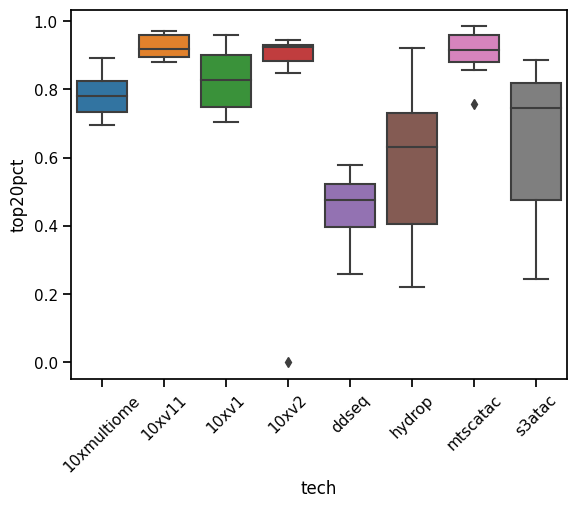

In [712]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="top20pct", x="tech", ax=ax)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '10xmultiome'),
  Text(1, 0, '10xv11'),
  Text(2, 0, '10xv1'),
  Text(3, 0, '10xv2'),
  Text(4, 0, 'ddseq'),
  Text(5, 0, 'hydrop'),
  Text(6, 0, 'mtscatac'),
  Text(7, 0, 's3atac')])

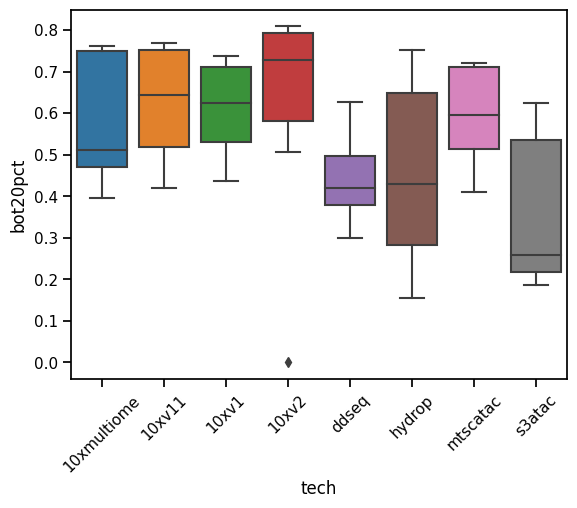

In [713]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="bot20pct", x="tech")
plt.xticks(rotation=45)

In [714]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}


tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [715]:
df_sub1 = pd.DataFrame()
df_sub1["Percentage Recovered"] = df_merged["top20pct"]
df_sub1["sample"] = df_merged["sample"]
df_sub1["cell_type"] = df_merged["cell_type"]
df_sub1["Percentile"] = "Top 20% DARs"

df_sub2 = pd.DataFrame()
df_sub2["Percentage Recovered"] = df_merged["bot20pct"]
df_sub2["sample"] = df_merged["sample"]
df_sub2["cell_type"] = df_merged["cell_type"]
df_sub2["Percentile"] = "Bottom 20% DARs"

df_merged_stack_dars = pd.concat([df_sub1, df_sub2])

In [716]:
df_merged_stack_dars["Technology"] = [
    tech_alias_dict[x.split("_")[0]] for x in df_merged_stack_dars.index
]
df_merged_stack_dars.reset_index(inplace=True, drop=True)

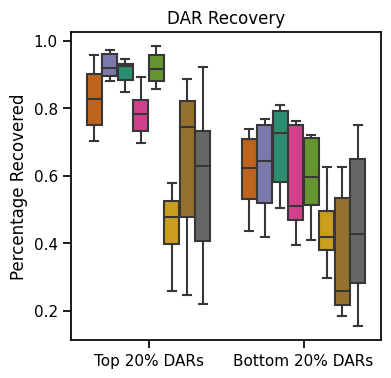

In [717]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    df_merged_stack_dars,
    y="Percentage Recovered",
    x="Percentile",
    hue="Technology",
    showfliers=False,
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    ax=ax,
)
plt.xticks(rotation=0, ha="center")
plt.xlabel(None)
lgd = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.get_legend().remove()

# plt.tight_layout()
plt.title("DAR Recovery")
plt.savefig("plts_final/DARs_recovery.png", dpi=600, facecolor="white")
plt.savefig("plts_final/DARs_recovery.svg", dpi=600, facecolor="white")

In [718]:
from sklearn.preprocessing import minmax_scale

In [719]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [720]:
cell_type_order

['B_cell',
 'CD4+_T_cell',
 'Cytotoxic_T_cell',
 'Natural_killer_cell',
 'CD14+_monocyte',
 'CD16+_monocyte',
 'Dendritic_cell']

In [721]:
df_merged_stack_dars["cell_type"].unique()

array(['Dendritic_cell', 'Cytotoxic_T_cell', 'Natural_killer_cell',
       'CD14+_monocyte', 'CD16+_monocyte', 'B_cell', 'CD4+_T_cell'],
      dtype=object)

In [722]:
df_pivot = (
    df_merged_stack_dars[df_merged_stack_dars["Percentile"] == "Top 20% DARs"]
    .pivot(columns="Technology", index="cell_type", values="Percentage Recovered")
    .T
)


df_pivot = df_pivot.loc[tech_alias_order]
df_pivot

cell_type,B_cell,CD14+_monocyte,CD16+_monocyte,CD4+_T_cell,Cytotoxic_T_cell,Dendritic_cell,Natural_killer_cell
Technology,,,,,,,
10x v1,0.866047,0.78214,0.717074,0.826163,0.957979,0.70389,0.937884
10x v1.1,0.961395,0.91843,0.959318,0.888953,0.971809,0.903806,0.880546
10x v2,0.945116,0.926566,0.931991,0.925581,0.921277,0.847344,0.0
10x Multiome,0.766977,0.893409,0.791247,0.781395,0.856383,0.69657,0.699659
mtscATAC-seq,0.935349,0.98454,0.981097,0.916279,0.856383,0.906943,0.758362
ddSEQ SureCell,0.495814,0.552482,0.259297,0.326744,0.476596,0.467378,0.579522
s3-ATAC,0.772558,0.885476,0.867269,0.522674,0.431915,0.745086,0.245734
HyDrop,0.630233,0.921888,0.76618,0.488953,0.324468,0.695943,0.22116


In [723]:
df_pivot = df_pivot[cell_type_order]

# df_pivot.index = [tech_alias_dict[x] for x in df_pivot.index]

df_pivot.columns = [cell_type_alias_dict[x] for x in df_pivot.columns]

df_pivot_normalized = df_pivot.astype(float).transform(
    lambda x: minmax_scale(x.astype(float))
)

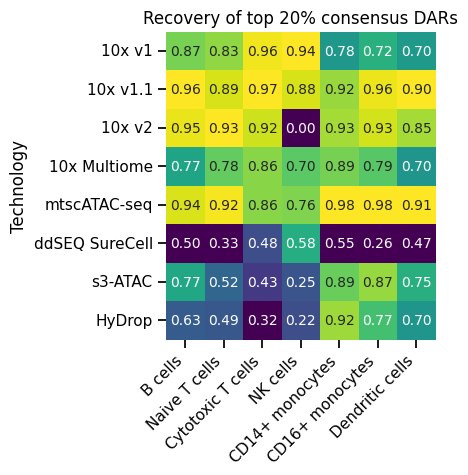

In [724]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    data=df_pivot_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    fmt=".2f",
    annot_kws={"fontsize": 10},
    annot=df_pivot,
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Recovery of top 20% consensus DARs")
plt.savefig(
    "plts_final/overlap_with_top20pct_consensus_dars.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/overlap_with_top20pct_consensus_dars.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

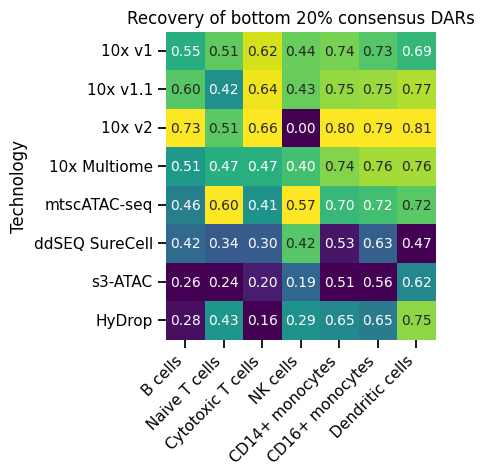

In [725]:
df_pivot = (
    df_merged_stack_dars[df_merged_stack_dars["Percentile"] == "Bottom 20% DARs"]
    .pivot(columns="Technology", index="cell_type", values="Percentage Recovered")
    .T
)

df_pivot

df_pivot = df_pivot.loc[tech_alias_order]
df_pivot = df_pivot[cell_type_order]

# df_pivot.index = [tech_alias_dict[x] for x in df_pivot.index]

df_pivot.columns = [cell_type_alias_dict[x] for x in df_pivot.columns]

df_pivot_normalized = df_pivot.astype(float).transform(
    lambda x: minmax_scale(x.astype(float))
)

fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    data=df_pivot_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    fmt=".2f",
    annot_kws={"fontsize": 10},
    annot=df_pivot,
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Recovery of bottom 20% consensus DARs")
plt.savefig(
    "plts_final/overlap_with_bot20pct_consensus_dars.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/overlap_with_bot20pct_consensus_dars.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# same analysis for peaks

In [726]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

samples_number_dict_rev = {y: x for x, y in samples_number_dict.items()}

cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "peaks_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}

peak_paths = {
    x.split("/")[-2].split("__")[0] + "__" + x.split("/")[-1]: x
    for x in sorted(glob.glob("final_consensus_peaks/*/*.bed"))
}
peak_paths

{'10xmultiome_celltypefair_1.FIXEDCELLS__Bcell_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/Bcell_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD14_monocyte_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD16_monocyte_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD16_monocyte_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD4_Tcell_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD4_Tcell_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__CytotoxicTcell_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CytotoxicTcell_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__Dendriticcell_summits.bed': 'final_consensus_peaks/10xmultiome_celltype

In [727]:
n_peak_dict = {}
for sample, peak_path in peak_paths.items():
    print(sample)
    df = pd.read_csv(peak_path, sep="\t", header=None)

    n_peak_dict[sample] = len(df)

n_peak_dict

10xmultiome_celltypefair_1.FIXEDCELLS__Bcell_summits.bed
10xmultiome_celltypefair_1.FIXEDCELLS__CD14_monocyte_summits.bed
10xmultiome_celltypefair_1.FIXEDCELLS__CD16_monocyte_summits.bed
10xmultiome_celltypefair_1.FIXEDCELLS__CD4_Tcell_summits.bed
10xmultiome_celltypefair_1.FIXEDCELLS__CytotoxicTcell_summits.bed
10xmultiome_celltypefair_1.FIXEDCELLS__Dendriticcell_summits.bed
10xmultiome_celltypefair_1.FIXEDCELLS__Naturalkillercell_summits.bed
10xv11_celltypefair_1.FIXEDCELLS__Bcell_summits.bed
10xv11_celltypefair_1.FIXEDCELLS__CD14_monocyte_summits.bed
10xv11_celltypefair_1.FIXEDCELLS__CD16_monocyte_summits.bed
10xv11_celltypefair_1.FIXEDCELLS__CD4_Tcell_summits.bed
10xv11_celltypefair_1.FIXEDCELLS__CytotoxicTcell_summits.bed
10xv11_celltypefair_1.FIXEDCELLS__Dendriticcell_summits.bed
10xv11_celltypefair_1.FIXEDCELLS__Naturalkillercell_summits.bed
10xv1_celltypefair_1.FIXEDCELLS__Bcell_summits.bed
10xv1_celltypefair_1.FIXEDCELLS__CD14_monocyte_summits.bed
10xv1_celltypefair_1.FIXEDCEL

{'10xmultiome_celltypefair_1.FIXEDCELLS__Bcell_summits.bed': 96395,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD14_monocyte_summits.bed': 111085,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD16_monocyte_summits.bed': 62633,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD4_Tcell_summits.bed': 89261,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CytotoxicTcell_summits.bed': 114736,
 '10xmultiome_celltypefair_1.FIXEDCELLS__Dendriticcell_summits.bed': 48524,
 '10xmultiome_celltypefair_1.FIXEDCELLS__Naturalkillercell_summits.bed': 58495,
 '10xv11_celltypefair_1.FIXEDCELLS__Bcell_summits.bed': 104620,
 '10xv11_celltypefair_1.FIXEDCELLS__CD14_monocyte_summits.bed': 112006,
 '10xv11_celltypefair_1.FIXEDCELLS__CD16_monocyte_summits.bed': 83393,
 '10xv11_celltypefair_1.FIXEDCELLS__CD4_Tcell_summits.bed': 98849,
 '10xv11_celltypefair_1.FIXEDCELLS__CytotoxicTcell_summits.bed': 117666,
 '10xv11_celltypefair_1.FIXEDCELLS__Dendriticcell_summits.bed': 68353,
 '10xv11_celltypefair_1.FIXEDCELLS__Naturalkillercell_s

In [728]:
peak_paths

{'10xmultiome_celltypefair_1.FIXEDCELLS__Bcell_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/Bcell_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD14_monocyte_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD16_monocyte_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD16_monocyte_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD4_Tcell_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD4_Tcell_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__CytotoxicTcell_summits.bed': 'final_consensus_peaks/10xmultiome_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CytotoxicTcell_summits.bed',
 '10xmultiome_celltypefair_1.FIXEDCELLS__Dendriticcell_summits.bed': 'final_consensus_peaks/10xmultiome_celltype

In [729]:
peak_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/*/*top20pct.bed"
        )
    )
}

n_peak_dict_top_merged = {}
for sample, peak_path in peak_paths.items():
    print(sample)
    df = pd.read_csv(peak_path, sep="\t", header=None)

    n_peak_dict_top_merged[sample.split("_summits")[0]] = len(df)

n_peak_dict_top_merged

Bcell_summits
CD14_monocyte_summits
CD16_monocyte_summits
CD4_Tcell_summits
CytotoxicTcell_summits
Dendriticcell_summits
Naturalkillercell_summits


{'Bcell': 31382,
 'CD14_monocyte': 42895,
 'CD16_monocyte': 23227,
 'CD4_Tcell': 33842,
 'CytotoxicTcell': 43866,
 'Dendriticcell': 24590,
 'Naturalkillercell': 20857}

In [730]:
peak_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/*/*bot20pct.bed"
        )
    )
}

n_peak_dict_bot_merged = {}
for sample, peak_path in peak_paths.items():
    print(sample)
    df = pd.read_csv(peak_path, sep="\t", header=None)

    n_peak_dict_bot_merged[sample.split("_summits")[0]] = len(df)

n_peak_dict_bot_merged

Bcell_summits
CD14_monocyte_summits
CD16_monocyte_summits
CD4_Tcell_summits
CytotoxicTcell_summits
Dendriticcell_summits
Naturalkillercell_summits


{'Bcell': 30124,
 'CD14_monocyte': 37629,
 'CD16_monocyte': 17746,
 'CD4_Tcell': 26445,
 'CytotoxicTcell': 32136,
 'Dendriticcell': 18228,
 'Naturalkillercell': 18796}

In [731]:
cell_types_numbers_dict = {
    "CD16_monocyte": "i",
    "CD4_Tcell": "j",
    "CD14_monocyte": "k",
    "Naturalkillercell": "l",
    "Dendriticcell": "m",
    "CytotoxicTcell": "n",
    "Bcell": "o",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}
cell_types_numbers_dict

{'CD16_monocyte': 'i',
 'CD4_Tcell': 'j',
 'CD14_monocyte': 'k',
 'Naturalkillercell': 'l',
 'Dendriticcell': 'm',
 'CytotoxicTcell': 'n',
 'Bcell': 'o'}

In [732]:
matrix_path

'upset_mergepeaks/h_7__bot20pct_dars_matrix.txt.count.matrix.txt'

In [733]:
cell_types_numbers_dict_rev

{'i': 'CD16_monocyte',
 'j': 'CD4_Tcell',
 'k': 'CD14_monocyte',
 'l': 'Naturalkillercell',
 'm': 'Dendriticcell',
 'n': 'CytotoxicTcell',
 'o': 'Bcell'}

In [734]:
matrix_path

'upset_mergepeaks/h_7__bot20pct_dars_matrix.txt.count.matrix.txt'

In [735]:
samples_number_dict_rev

{0: '10xmultiome_celltypefair_1',
 1: '10xv11_celltypefair_1',
 2: '10xv1_celltypefair_1',
 3: '10xv2_celltypefair_1',
 4: 'ddseq_celltypefair_1',
 5: 'hydrop_celltypefair_1',
 6: 'mtscatac_celltypefair_1',
 7: 's3atac_celltypefair_1'}

In [736]:
df_merged = pd.DataFrame(columns=["top20pct", "bot20pct", "cell_type"])
for matrix_path in sorted(glob.glob("upset_mergepeaks/*top20*peaks*count.matrix*")):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_peaks_top = n_peak_dict_top_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "top20pct"] = ratio_found

upset_mergepeaks/i_0__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_1__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_2__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_3__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_4__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_5__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_6__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_7__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_0__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_1__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_2__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_3__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_4__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_5__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_6__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_7__top

In [737]:
for matrix_path in sorted(glob.glob("upset_mergepeaks/*bot20*peaks*count.matrix*")):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_peaks_top = n_peak_dict_bot_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "bot20pct"] = ratio_found

upset_mergepeaks/i_0__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_1__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_2__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_3__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_4__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_5__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_6__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/i_7__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_0__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_1__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_2__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_3__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_4__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_5__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_6__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks/j_7__bot

In [738]:
df_merged["cell_type"] = [x.split("__")[1] for x in df_merged.index]
df_merged["sample"] = [x.split("__")[0] for x in df_merged.index]
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]

df_merged

,top20pct,bot20pct,cell_type,sample,tech
10xmultiome_celltypefair_1__CD16_monocyte,0.977182,0.100192,CD16_monocyte,10xmultiome_celltypefair_1,10xmultiome
10xv11_celltypefair_1__CD16_monocyte,0.992681,0.197847,CD16_monocyte,10xv11_celltypefair_1,10xv11
10xv1_celltypefair_1__CD16_monocyte,0.984458,0.106841,CD16_monocyte,10xv1_celltypefair_1,10xv1
10xv2_celltypefair_1__CD16_monocyte,0.998579,0.322326,CD16_monocyte,10xv2_celltypefair_1,10xv2
ddseq_celltypefair_1__CD16_monocyte,0.883713,0.107404,CD16_monocyte,ddseq_celltypefair_1,ddseq
hydrop_celltypefair_1__CD16_monocyte,0.596676,0.003719,CD16_monocyte,hydrop_celltypefair_1,hydrop
mtscatac_celltypefair_1__CD16_monocyte,0.914582,0.043954,CD16_monocyte,mtscatac_celltypefair_1,mtscatac
s3atac_celltypefair_1__CD16_monocyte,0.31782,0.007382,CD16_monocyte,s3atac_celltypefair_1,s3atac
10xmultiome_celltypefair_1__CD4_Tcell,0.993558,0.091775,CD4_Tcell,10xmultiome_celltypefair_1,10xmultiome
10xv11_celltypefair_1__CD4_Tcell,0.998936,0.131896,CD4_Tcell,10xv11_celltypefair_1,10xv11


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '10xmultiome'),
  Text(1, 0, '10xv11'),
  Text(2, 0, '10xv1'),
  Text(3, 0, '10xv2'),
  Text(4, 0, 'ddseq'),
  Text(5, 0, 'hydrop'),
  Text(6, 0, 'mtscatac'),
  Text(7, 0, 's3atac')])

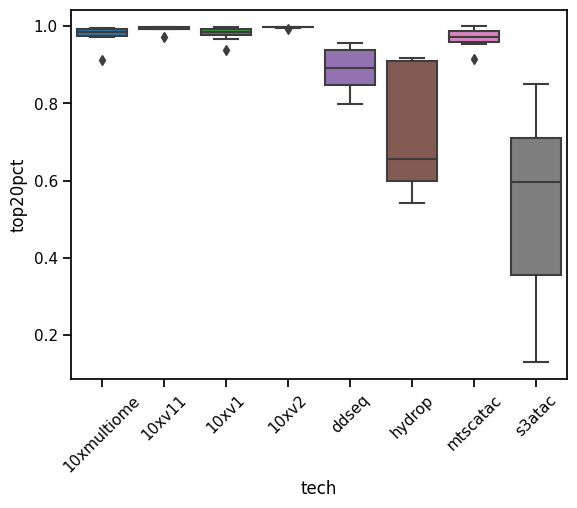

In [739]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="top20pct", x="tech", ax=ax)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '10xmultiome'),
  Text(1, 0, '10xv11'),
  Text(2, 0, '10xv1'),
  Text(3, 0, '10xv2'),
  Text(4, 0, 'ddseq'),
  Text(5, 0, 'hydrop'),
  Text(6, 0, 'mtscatac'),
  Text(7, 0, 's3atac')])

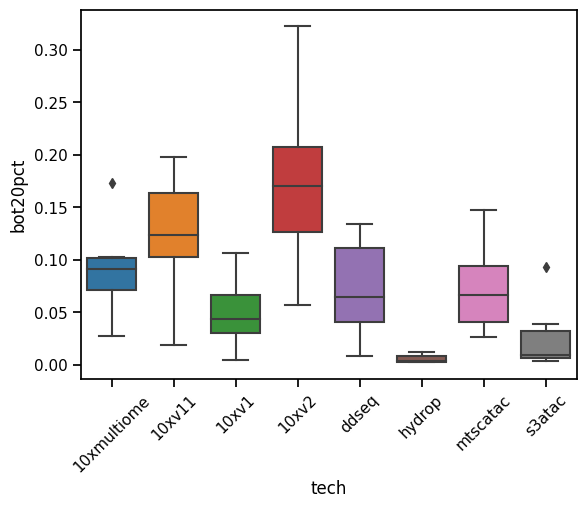

In [740]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="bot20pct", x="tech")
plt.xticks(rotation=45)

In [741]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}


tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [742]:
df_sub1 = pd.DataFrame()
df_sub1["Percentage Recovered"] = df_merged["top20pct"]
df_sub1["sample"] = df_merged["sample"]
df_sub1["cell_type"] = df_merged["cell_type"]
df_sub1["Percentile"] = "Top 20% peaks"

df_sub2 = pd.DataFrame()
df_sub2["Percentage Recovered"] = df_merged["bot20pct"]
df_sub2["sample"] = df_merged["sample"]
df_sub2["cell_type"] = df_merged["cell_type"]
df_sub2["Percentile"] = "Bottom 20% peaks"

df_merged_stack_peaks = pd.concat([df_sub1, df_sub2])

df_merged_stack_peaks["Technology"] = [
    tech_alias_dict[x.split("_")[0]] for x in df_merged_stack_peaks.index
]
df_merged_stack_peaks.reset_index(inplace=True, drop=True)

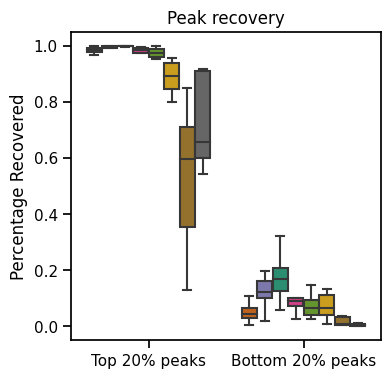

In [743]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    df_merged_stack_peaks,
    y="Percentage Recovered",
    x="Percentile",
    hue="Technology",
    showfliers=False,
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    ax=ax,
)
plt.xticks(rotation=0, ha="center")
plt.xlabel(None)
lgd = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.get_legend().remove()
plt.title("Peak recovery")

# plt.tight_layout()
plt.savefig("plts_final/peaks_recovery.png", dpi=600, facecolor="white")
plt.savefig("plts_final/peaks_recovery.svg", dpi=600, facecolor="white")

In [744]:
from sklearn.preprocessing import minmax_scale

In [745]:
cell_type_alias_dict = {
    "Bcell": "B cells",
    "CD14_monocyte": "CD14+ monocytes",
    "CD4_Tcell": "Naive T cells",
    "CytotoxicTcell": "Cytotoxic T cells",
    "Dendriticcell": "Dendritic cells",
    "Naturalkillercell": "NK cells",
    "CD16_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "Bcell",
    "CD4_Tcell",
    "CytotoxicTcell",
    "Naturalkillercell",
    "CD14_monocyte",
    "CD16_monocyte",
    "Dendriticcell",
]

In [746]:
df_pivot = (
    df_merged_stack_peaks[df_merged_stack_peaks["Percentile"] == "Top 20% peaks"]
    .pivot(columns="Technology", index="cell_type", values="Percentage Recovered")
    .T
)


df_pivot = df_pivot.loc[tech_alias_order]
df_pivot = df_pivot[cell_type_order]

# df_pivot.index = [tech_alias_dict[x] for x in df_pivot.index]

df_pivot.columns = [cell_type_alias_dict[x] for x in df_pivot.columns]

df_pivot_normalized = df_pivot.astype(float).transform(
    lambda x: minmax_scale(x.astype(float))
)

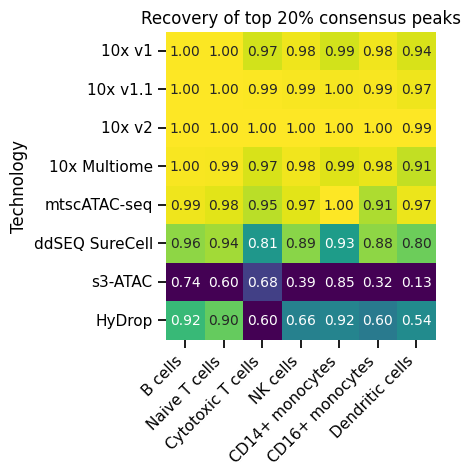

In [747]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    data=df_pivot_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    fmt=".2f",
    annot_kws={"fontsize": 10},
    annot=df_pivot,
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Recovery of top 20% consensus peaks")
plt.savefig(
    "plts_final/overlap_with_top20pct_consensus_peaks.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/overlap_with_top20pct_consensus_peaks.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

In [748]:
df_pivot = (
    df_merged_stack_peaks[df_merged_stack_peaks["Percentile"] == "Bottom 20% peaks"]
    .pivot(columns="Technology", index="cell_type", values="Percentage Recovered")
    .T
)

df_pivot

df_pivot = df_pivot.loc[tech_alias_order]
df_pivot = df_pivot[cell_type_order]

# df_pivot.index = [tech_alias_dict[x] for x in df_pivot.index]

df_pivot.columns = [cell_type_alias_dict[x] for x in df_pivot.columns]

df_pivot_normalized = df_pivot.astype(float).transform(
    lambda x: minmax_scale(x.astype(float))
)

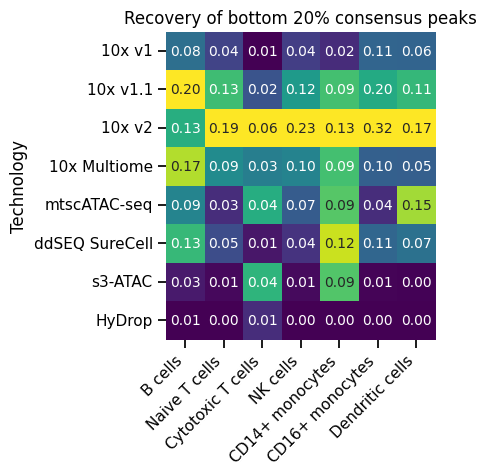

In [749]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    data=df_pivot_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    fmt=".2f",
    annot_kws={"fontsize": 10},
    annot=df_pivot,
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Recovery of bottom 20% consensus peaks")
plt.savefig(
    "plts_final/overlap_with_bot20pct_consensus_peaks.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/overlap_with_bot20pct_consensus_peaks.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)